<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-баланс-классов,-обучим-модель-без-учёта-дисбаланса" data-toc-modified-id="Исследуем-баланс-классов,-обучим-модель-без-учёта-дисбаланса-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем баланс классов, обучим модель без учёта дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-моделям" data-toc-modified-id="Вывод-по-моделям-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод по моделям</a></span></li></ul></li><li><span><a href="#Вывод-о-балансе" data-toc-modified-id="Вывод-о-балансе-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод о балансе</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом-и-нахождение-лучшей-модели" data-toc-modified-id="Борьба-с-дисбалансом-и-нахождение-лучшей-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом и нахождение лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Описание проекта "Отток клиентов"

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Стоит задача построить модель с предельно большим значением *F1*-меры. Был установлен минимум значения метрики - до 0.59.

Дополнительно будем *AUC-ROC*, сравнивая её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split # загруажаем модели и ее метрику
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle 
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**Описание данных**

* `RowNumber` — индекс строки в данных;
* `CustomerId` — уникальный идентификатор клиента;
* `Surname` — фамилия;
* `CreditScore` — кредитный рейтинг;
* `Geography` — страна проживания;
* `Gender` — пол;
* `Age` — возраст;
* `Tenure` — сколько лет человек является клиентом банка;
* `Balance` — баланс на счёте;
* `NumOfProducts` — количество продуктов банка, используемых клиентом;
* `HasCrCard` — наличие кредитной карты;
* `IsActiveMember` — активность клиента;
* `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
* **`Exited`** — факт ухода клиента


Мы видим здесь задачу **классификации** - `Целевой признак` **Exited** является **категориальным**

* Рассмотрим таблицу детально:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
ten_isna = data['Tenure'].isna().mean()
print(f'Доля пропусков в колонке \'Tenure\': {ten_isna:.0%}')

Доля пропусков в колонке 'Tenure': 9%


In [7]:
data['Tenure'].value_counts().to_frame()

,Tenure
1.0,952
2.0,950
8.0,933
3.0,928
5.0,927
7.0,925
4.0,885
9.0,882
6.0,881
10.0,446


Наблюдаем в столбце **`Tenure`** пропуски в размере **9%**. Возможно, это связано с неполным заполнением данных, либо ошибкой при выгрузке данных. Также видим неудобный/неподходящий тип данных заполнения этой колонки.

Чтобы `поменять тип данных` с вещественного на целочисленный, `заменим пропуски` **`-1`** (можно было медианой, но считаю не совсем целесообразным)

In [8]:
data['Tenure'] = data['Tenure'].fillna(value=-1)
print(data.loc[data['Tenure'] == -1, 'Tenure'].count()) # проверяем
data['Tenure'] = data['Tenure'].astype('int')

909


In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Подмечаем, что столбцы `'RowNumber', 'CustomerId', 'Surname'` никак не влияют на целевой признак и являются лишними. Удалим их:

In [10]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).reset_index(drop=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data['Geography'].value_counts().to_frame()

,Geography
France,5014
Germany,2509
Spain,2477


In [12]:
data['Gender'].value_counts().to_frame()

,Gender
Male,5457
Female,4543


Видим, что в колонке `'Geography'` всего три столбца. В столбце `'Gender'` два. Все это нам следует преобразовать техникой прямого кодирования **One-hot Encoding (OHE)**, что далее поможет нам применить модели

Применим ко всему датафрейму:

In [14]:
data_ohe = pd.get_dummies(data, drop_first=True) # избегаем дамми-ловушки, сбрасывая первую колонку
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
data.duplicated().sum()

0

### Вывод

* Данные были загружены и разобраны;
* Пропуски были обработаны и приведен подходящий тип данных в колонке `'Tenure'`;
* Удалены ненужные колонки (`'RowNumber', 'CustomerId', 'Surname'`) для поставленной задачи целевого признака;
* Применили технику прямого кодирования для использования моделей решений. Колонка `'Geography'` была разделена на две категории (`'Geography_Germany, Geography_Spain'`), третью можно восстановить по этим двум. Так мы не попадаем на **дамми-ловушку**
* Проверили на наличие дубликатов

## Исследование задачи

Разделяем данные на признаки и целевой признак, затем разделяем выборки на обучающую, валидационную и тестовую

In [16]:
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
features = data_ohe.drop(['Exited'], axis=1) # признаки
target = data_ohe['Exited']

In [18]:
data_train, sample_for_valid_test = train_test_split(data_ohe, test_size=0.4, random_state=12345)
data_valid, data_test = train_test_split(sample_for_valid_test, test_size=0.5, random_state=12345)

features_train = data_train.drop(['Exited'], axis=1) # сохраняем признаки для обучающей выборки 
target_train = data_train['Exited'] # сохраняем целевой признак для обучающей выборки 

features_valid = data_valid.drop(['Exited'], axis=1) # для валидационной 
target_valid = data_valid['Exited']

features_test = data_test.drop(['Exited'], axis=1) # для тестовой
target_test = data_test['Exited']

print(f'Train: {features_train.shape}, {target_train.shape}')
print(f'Valid: {features_valid.shape}, {target_valid.shape}')
print(f'Test: {features_test.shape}, {target_test.shape}')

Train: (6000, 11), (6000,)
Valid: (2000, 11), (2000,)
Test: (2000, 11), (2000,)


In [19]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,438,38,2,0.00,2,1,0,136859.55,0,0,1
5709,644,39,9,0.00,1,1,0,3740.93,0,0,0
7117,564,31,5,121461.87,1,1,1,20432.09,0,1,1
7775,628,40,10,0.00,2,1,0,103832.58,0,1,1
8735,728,30,10,114835.43,1,0,1,37662.49,0,0,1


* Теперь, чтобы алгоритм не решил, что что-то важнее из-за разброса чисел, масштабируем данные путем стандартизации данных **StandardScaler():**

In [20]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts'] # выделяем количественные 
                                                                    # колонки для масштабирования
scaler = StandardScaler()

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#features_train.head()
#features_valid.head()
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-0.760164,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.390954,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.161744,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.698257,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.698257,0.615625,-0.891560,0,1,-1.070919,0,0,1


### Исследуем баланс классов, обучим модель без учёта дисбаланса

Для этого создадим функции для трех моделей

* Модель Рещающее Дерево **DecisionTreeClassifier()**

In [21]:
def func_dtc(features_train, features_valid, target_train, target_valid): # берем за аргументы выборки 
    best_parameters_acc = [] # включаем список гиперпараметров данной модели
    best_acc = 0 # берем как сравнение для выявления лучшей метрики accuracy
    best_parameters_f1 = [] 
    best_f1 = 0
    best_parameters_auc_roc = []
    best_auc = 0.5 # случайной модели
    
    for max_depth in range(2, 10): # создаем цикл, который перебирает максимальную глубокость дерева в данном рэндже для модели
        for min_samples_split in range(2, 8): 
            for min_samples_leaf in range(1, 10): 
                for criterion in ['gini', 'entropy']: # перебирает критерии 
                    model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, # задаем гиперпараметры
                                                   min_samples_split=min_samples_split,
                                                   min_samples_leaf=min_samples_leaf, criterion=criterion)
                    model.fit(features_train, target_train) # обучаем модель 
                    predicted = model.predict(features_valid)
                    
                    class_frequency = pd.Series(model.predict(features_valid)).value_counts(normalize=True) # заводим переменную чистоты для подсчета относительных частот 
                                                                                                            # Переводим таблицу в тип Series, чтобы смогла value_counts() выявить классы
                    cm = confusion_matrix(target_valid, predicted) # выводим матрицу ошибок для проверки баланса
                    
                    acc = accuracy_score(target_valid, predicted) # считаем метрику
                    if acc > best_acc:
                        best_acc = acc
                        best_parameters_acc = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        
                    f1 = f1_score(target_valid, predicted)
                    if f1 > best_f1:
                        best_f1 = f1
                        best_parameters_f1 = [max_depth, min_samples_split, min_samples_leaf, criterion]
                
                    auc = roc_auc_score(target_valid, predicted)
                    if auc > best_auc:
                        best_auc = auc
                        best_parameters_auc_roc = [max_depth, min_samples_split, min_samples_leaf, criterion]
    print(f'Лучшая точность (accuracy) модели Решающего дерева: {best_acc}')
    print(f'Лучшие параметры метрики accuracy_score: max_depth = {best_parameters_acc[0]}, min_samples_split = {best_parameters_acc[1]}, min_samples_leaf = {best_parameters_acc[2]}, criterion = {best_parameters_acc[3]}')
    print()
    print(f'Лучшее значение метрики f1 модели Решающего дерева: {round(best_f1, 3)}')
    print(f'Лучшие параметры метрики f1: max_depth = {best_parameters_f1[0]}, min_samples_split = {best_parameters_f1[1]}, min_samples_leaf = {best_parameters_f1[2]}, criterion = {best_parameters_f1[3]}')
    print()
    print(f'Лучшее значение AUC-ROC модели Решающего дерева: {round(best_auc, 3)}')
    print(f'Лучшие параметры метрики AUC-ROC: max_depth = {best_parameters_auc_roc[0]}, min_samples_split = {best_parameters_auc_roc[1]}, min_samples_leaf = {best_parameters_auc_roc[2]}, criterion = {best_parameters_auc_roc[3]}')
    print()
    print('Относительные частоты модели Решающего Дерева для проверки баланса:')
    print(class_frequency)
    print()
    print('Матрица ошибок для выявления баланса в модели Решающего Дерева:')
    display(cm)
    
func_dtc(features_train, features_valid, target_train, target_valid)

Лучшая точность (accuracy) модели Решающего дерева: 0.8605
Лучшие параметры метрики accuracy_score: max_depth = 6, min_samples_split = 5, min_samples_leaf = 2, criterion = gini

Лучшее значение метрики f1 модели Решающего дерева: 0.577
Лучшие параметры метрики f1: max_depth = 6, min_samples_split = 6, min_samples_leaf = 2, criterion = gini

Лучшее значение AUC-ROC модели Решающего дерева: 0.713
Лучшие параметры метрики AUC-ROC: max_depth = 9, min_samples_split = 7, min_samples_leaf = 2, criterion = gini

Относительные частоты модели Решающего Дерева для проверки баланса:
0    0.8595
1    0.1405
dtype: float64

Матрица ошибок для выявления баланса в модели Решающего Дерева:


array([[1495,   87],
       [ 224,  194]])

* Модель Случайный Лес **RandomForestClassifier()**

In [22]:
def func_rfc(features_train, features_valid, target_train, target_valid):
    
    best_parameters_acc = [] 
    best_acc = 0 
    best_parameters_f1 = [] 
    best_f1 = 0
    best_parameters_auc_roc = []
    best_auc = 0.5 
    
    for n_estimators in range(30, 40): # перебирает кол-во деревьев
        for max_depth in range(8, 16, 2): # создаем цикл, который перебирает максимальную глубокость дерева в данном рэндже для модели (делаем шаг в 2, т.к ну загружал вообще)
            for min_samples_split in range(2, 4): 
                for min_samples_leaf in range(1, 4): 
                    for criterion in ['gini', 'entropy']: 
                        model = RandomForestClassifier(random_state=12345, n_estimators=n_estimators,
                                                       max_depth=max_depth, 
                                                       min_samples_split=min_samples_split,
                                                       min_samples_leaf=min_samples_leaf, criterion=criterion)
                        model.fit(features_train, target_train) 
                        predicted = model.predict(features_valid)
                        
                        class_frequency = pd.Series(model.predict(features_valid)).value_counts(normalize=True)
                        
                        cm = confusion_matrix(target_valid, predicted)
                        
                        acc = accuracy_score(target_valid, predicted) 
                        if acc > best_acc:
                            best_acc = acc
                            best_parameters_acc = [n_estimators, max_depth, min_samples_split, 
                                                   min_samples_leaf, criterion]
                    
                        f1 = f1_score(target_valid, predicted)
                        if f1 > best_f1:
                            best_f1 = f1
                            best_parameters_f1 = [n_estimators, max_depth, min_samples_split, 
                                                  min_samples_leaf, criterion]
                
                        auc = roc_auc_score(target_valid, predicted)
                        if auc > best_auc:
                            best_auc = auc
                            best_parameters_auc_roc = [n_estimators, max_depth, min_samples_split, 
                                                       min_samples_leaf, criterion]
    print(f'Лучшая точность (accuracy) модели Случайного Леса: {best_acc}')
    print(f'Лучшие параметры метрики accuracy_score: n_estimators = {best_parameters_acc[0]}, max_depth = {best_parameters_acc[1]}, min_samples_split = {best_parameters_acc[2]}, min_samples_leaf = {best_parameters_acc[3]}, criterion = {best_parameters_acc[4]}')
    print()
    print(f'Лучшее значение метрики f1 модели Случайного Леса: {round(best_f1, 3)}')
    print(f'Лучшие параметры метрики f1: n_estimators = {best_parameters_f1[0]}, max_depth = {best_parameters_f1[1]}, min_samples_split = {best_parameters_f1[2]}, min_samples_leaf = {best_parameters_f1[3]}, criterion = {best_parameters_f1[4]}')
    print()
    print(f'Лучшее значение AUC-ROC модели Случайного Леса: {round(best_auc, 3)}')
    print(f'Лучшие параметры метрики AUC-ROC: n_estimators = {best_parameters_auc_roc[0]}, max_depth = {best_parameters_auc_roc[1]}, min_samples_split = {best_parameters_auc_roc[2]}, min_samples_leaf = {best_parameters_auc_roc[3]}, criterion = {best_parameters_auc_roc[4]}')
    print()
    print('Относительные частоты модели Случайного Леса для проверки баланса:')
    print(class_frequency)
    print()
    print('Матрица ошибок для выявления баланса в модели Случайного Леса:')
    display(cm)
    
func_rfc(features_train, features_valid, target_train, target_valid)    

Лучшая точность (accuracy) модели Случайного Леса: 0.8655
Лучшие параметры метрики accuracy_score: n_estimators = 33, max_depth = 8, min_samples_split = 2, min_samples_leaf = 1, criterion = gini

Лучшее значение метрики f1 модели Случайного Леса: 0.593
Лучшие параметры метрики f1: n_estimators = 35, max_depth = 14, min_samples_split = 2, min_samples_leaf = 1, criterion = gini

Лучшее значение AUC-ROC модели Случайного Леса: 0.722
Лучшие параметры метрики AUC-ROC: n_estimators = 35, max_depth = 14, min_samples_split = 2, min_samples_leaf = 1, criterion = gini

Относительные частоты модели Случайного Леса для проверки баланса:
0    0.882
1    0.118
dtype: float64

Матрица ошибок для выявления баланса в модели Случайного Леса:


array([[1538,   44],
       [ 226,  192]])

* Модель Логистическая Регрессия **LogisticRegression()** 

(здесь не задаем функцию, а перебираем цикл с максимальными итерациями, и задаем гипермараметр псевдослучайности и алгоритм решения - линейный)

In [23]:
best_max_iter = 0
best_accuracy = 0 
best_f1 = 0
best_auc = 0.5

for max_iter in range(1, 1001, 10):
    model_lr = LogisticRegression(random_state=12345, solver='liblinear', max_iter=max_iter)
    model_lr.fit(features_train, target_train)
    predicted_lr = model_lr.predict(features_valid)
    
    class_frequency_lr = pd.Series(model_lr.predict(features_valid)).value_counts(normalize=True)
    class_frequency_lr_train = pd.Series(model_lr.predict(features_train)).value_counts(normalize=True)
    
    cm_lr = confusion_matrix(target_valid, predicted_lr)
    
    acc = accuracy_score(target_valid, predicted_lr)
    if acc > best_accuracy:
        best_accuracy = acc
        best_max_iter = max_iter
        
    f1 = f1_score(target_valid, predicted_lr)
    if f1 > best_f1:
        best_f1 = f1
        best_max_iter = max_iter
        
    probabilities_valid = model_lr.predict_proba(features_valid) # так как метрика auc_roc принимает не предсказания, 
                                            # а вероятности класса "1" в Логистической Регрессии, 
                                            # то тут считается вероятности класса методом predict_proba()
    probabilities_one_valid = probabilities_valid[:, 1]
    auc = roc_auc_score(target_valid, probabilities_one_valid)
    if auc > best_auc:
        best_auc = auc
        best_max_iter = max_iter
    
print(f'Лучшая точность (accuracy) модели Логистической Регрессии: {best_accuracy}')
print('Лучшее кол-во итераций обучения (max_iter) модели', best_max_iter, sep=': ')
print()
print(f'Лучшее значение метрики f1 модели Логистической Регрессии: {round(best_f1, 3)}')
print('Лучшее кол-во итераций обучения (max_iter) метрики f1', best_max_iter, sep=': ')
print()
print(f'Лучшее значение AUC-ROC модели Логистической Регрессии: {round(best_auc, 3)}')
print(f'Лучшее кол-во итераций метрики AUC-ROC', best_max_iter, sep=': ')
print()
print('Относительные частоты модели Логистической Регрессии для проверки баланса:')
print(class_frequency_lr)
print()
print('Матрица ошибок для выявления баланса в модели Логистической Регрессии:')
display(cm_lr)
print()
print(class_frequency_lr_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Лучшая точность (accuracy) модели Логистической Регрессии: 0.8025
Лучшее кол-во итераций обучения (max_iter) модели: 11

Лучшее значение метрики f1 модели Логистической Регрессии: 0.334
Лучшее кол-во итераций обучения (max_iter) метрики f1: 11

Лучшее значение AUC-ROC модели Логистической Регрессии: 0.759
Лучшее кол-во итераций метрики AUC-ROC: 11

Относительные частоты модели Логистической Регрессии для проверки баланса:
0    0.9125
1    0.0875
dtype: float64

Матрица ошибок для выявления баланса в модели Логистической Регрессии:


array([[1506,   76],
       [ 319,   99]])


0    0.923167
1    0.076833
dtype: float64


* Построим **ROC-кривую** для Логистической Регрессии (она поможет выявить подходящее соотношение TPR и FPR для поставленной задачи)

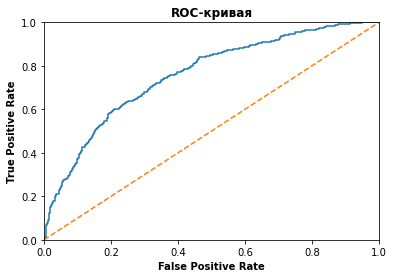

In [24]:
model_lr_curve = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_curve.fit(features_train, target_train)
probabilities_valid = model_lr_curve.predict_proba(features_valid)
probabilities_one_valid_curve = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_curve) # в переменнхы значения True Positive Rate,
                                                                        # False Positive Rate и рассмотренные пороги
    
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC-кривая', fontweight='bold')
plt.show();

#### Вывод по моделям

* `Метрика f1` модели `Решающего Дерева` - **0.577**, что **`недостаточно`** по условиям поставленной задачи (0.59), `Метрика AUC-ROC` при этом равна **0.713**. При помощи выявления относительных частот выявили, что присутствует дисбаланс классов (**`класс "0"` встречается примерно `86%`, `класс "1" - 14%` соответственно**). **Матрица ошибок** показала то же самое (`много` значений `TN` (истинно отрицательные предсказания) **`!но меньше, чем у остальных моделей!`**, но при этом выдал и `немало` ложноотрицательных значений (`FN`) и `большее среди всех моделей` истинно положительных ответов (`TP`);


* `Метрика f1` модели `Случайного леса` - **0.593**, что уже **`достаточно`** по условиям поставленной задачи (0.59), `Метрика AUC-ROC` при этом равна **0.722**. Также присутствует дисбаланс классов (**`класс "0"` встречается очень часто. Примерно `91,5%`, а `класс "1" - 8,5%` соответственно**). **Матрица ошибок** показала то же самое (`много` значений `TN` (истинно отрицательные предсказания), но при этом выдал и `немало` ложноотрицательных значений (`FN`)


* `Метрика f1` модели `Логистической Регрессии` меньше всех - **0.334**, что также **`недостаточно`** по условиям поставленной задачи (0.59), `Метрика AUC-ROC` при этом равна **0.759**. Как и всех моделей наблюдается дисбаланс классов (**`класс "0"` встречается чаще всех остальных моделей. Примерно `91,3%`, а `класс "1" - 8,7%` соответственно**). **Матрица ошибок** показала то же самое (`много` значений `TN` (истинно отрицательные предсказания), но при этом модель `видит отрицательные ответы там, где их нет (FN)`

**Теперь рассмотрим баланс классов на выборках целевого признака (Series):**

,Exited
0,0.800667
1,0.199333


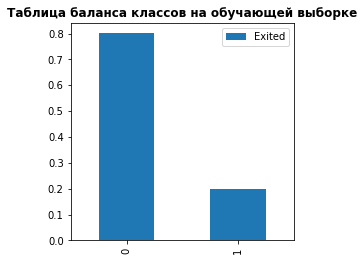

In [25]:
ttvc = target_train.value_counts(normalize=True).to_frame() # параметр normalize - частоты относительные 
display(ttvc)
ttvc.plot(kind='bar', figsize=(4, 4))
plt.title('Таблица баланса классов на обучающей выборке', fontweight='bold');

,Exited
0,0.791
1,0.209


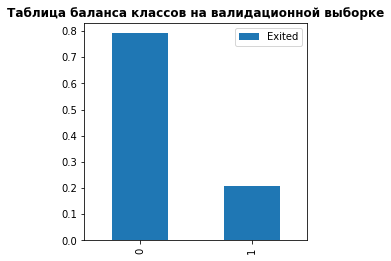

In [26]:
tvvc = target_valid.value_counts(normalize=True).to_frame()
display(tvvc)
tvvc.plot(kind='bar', figsize=(4, 4))
plt.title('Таблица баланса классов на валидационной выборке', fontweight='bold');

### Вывод о балансе

Наблюдается характерный **`дисбаланс`** классов в примерном **соотношениие `4:1`**

## Борьба с дисбалансом и нахождение лучшей модели

* Попробуем сначала `указать равнозначность классов` (**class_weight='balanced'**) в модели Логистической Регрессии

In [27]:
model_lr_balanced = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr_balanced.fit(features_train, target_train)
predict_lr_balanced = model_lr_balanced.predict(features_valid)
f1_balanced = f1_score(target_valid, predict_lr_balanced)
probabilities_lr_balanced = model_lr_balanced.predict_proba(features_valid)[:, 1]
roc_auc_lr_balanced = roc_auc_score(target_valid, probabilities_lr_balanced)
print(f'Метрика f1 Логистической Регрессии после сбалансирования классов: {round(f1_balanced, 3)}')
print()
print(f'Метрика AUC-ROC Логистической Регрессии после сбалансирования классов: {round(roc_auc_lr_balanced, 3)}')

Метрика f1 Логистической Регрессии после сбалансирования классов: 0.489

Метрика AUC-ROC Логистической Регрессии после сбалансирования классов: 0.763


* После сбалансирования классов в Логистической Регрессии **метрика f1 `стала лучше`**, но все так же **незначительно:** 
    * (**`было 0.334; 
    стало 0.489`**);
* **Метрика AUC-ROC** также стала лучше, но совсем не значительно: 
     * (**`было 0.759;
стало 0.763`**)

**Теперь попробуем увеличить объекты класса "1" техникой `upsampling`:**


* Разделим обучающую выборку на отрицательные и положительные объекты;
* Скопируем несколько раз положительные объекты;
* С учётом полученных данных создадим новую обучающую выборку;
* Перемешаем данные

In [28]:
def upsample(features, target, repeat):
    
    features_zero = features[target==0]
    features_one = features[target==1]
    target_zero = target[target==0]
    target_one = target[target==1]
    
    features_upsampled = pd.concat([features_zero] + [features_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
display(target_upsampled.value_counts(normalize=True))

0    0.501043
1    0.498957
Name: Exited, dtype: float64

Повторили 4 раза и теперь рассмотрим модели

* **Логистическая Регрессия**

 :::::: После применения техники upsampling (увеличение выборки) ::::::::

F1 upsampled в Логистической Регрессии: 0.489
AUC-ROC upsampled в Логистической Регрессии: 0.763



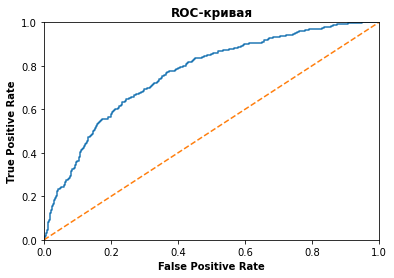

In [29]:
model_up1 = LogisticRegression(random_state=12345, solver='liblinear', max_iter=11, class_weight='balanced')
model_up1.fit(features_upsampled, target_upsampled)
predicted_valid = model_up1.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_upsampled = model_up1.predict_proba(features_valid)[:, 1]
roc_auc_upsampled = roc_auc_score(target_valid, probabilities_upsampled)
#cm_lr_up = confusion_matrix(target_valid, predicted_valid)
print(' :::::: После применения техники upsampling (увеличение выборки) ::::::::')
print()
print(f'F1 upsampled в Логистической Регрессии: {round(f1, 3)}')
print(f'AUC-ROC upsampled в Логистической Регрессии: {round(roc_auc_upsampled, 3)}')
print()
#print(cm_lr_up)

fpr, tpr, threshold = roc_curve(target_valid, probabilities_upsampled)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC-кривая', fontweight='bold')
plt.show();

* **Для Случайного Леса применим функцию, которая была уже проделана, только на новых увеличенных выборках**

In [30]:
print(' :::::: После применения техники upsampling (увеличение выборки) ::::::::')
print()
func_rfc(features_upsampled, features_valid, target_upsampled, target_valid)

 :::::: После применения техники upsampling (увеличение выборки) ::::::::

Лучшая точность (accuracy) модели Случайного Леса: 0.8455
Лучшие параметры метрики accuracy_score: n_estimators = 39, max_depth = 14, min_samples_split = 2, min_samples_leaf = 1, criterion = gini

Лучшее значение метрики f1 модели Случайного Леса: 0.631
Лучшие параметры метрики f1: n_estimators = 37, max_depth = 10, min_samples_split = 2, min_samples_leaf = 3, criterion = entropy

Лучшее значение AUC-ROC модели Случайного Леса: 0.786
Лучшие параметры метрики AUC-ROC: n_estimators = 30, max_depth = 8, min_samples_split = 2, min_samples_leaf = 2, criterion = entropy

Относительные частоты модели Случайного Леса для проверки баланса:
0    0.7705
1    0.2295
dtype: float64

Матрица ошибок для выявления баланса в модели Случайного Леса:


array([[1393,  189],
       [ 148,  270]])

* **Также и для Решающего Дерева**

In [31]:
print(' :::::: После применения техники upsampling (увеличение выборки) ::::::::')
print()
func_dtc(features_upsampled, features_valid, target_upsampled, target_valid)

 :::::: После применения техники upsampling (увеличение выборки) ::::::::

Лучшая точность (accuracy) модели Решающего дерева: 0.814
Лучшие параметры метрики accuracy_score: max_depth = 5, min_samples_split = 2, min_samples_leaf = 4, criterion = entropy

Лучшее значение метрики f1 модели Решающего дерева: 0.601
Лучшие параметры метрики f1: max_depth = 5, min_samples_split = 2, min_samples_leaf = 4, criterion = entropy

Лучшее значение AUC-ROC модели Решающего дерева: 0.761
Лучшие параметры метрики AUC-ROC: max_depth = 5, min_samples_split = 2, min_samples_leaf = 4, criterion = entropy

Относительные частоты модели Решающего Дерева для проверки баланса:
0    0.698
1    0.302
dtype: float64

Матрица ошибок для выявления баланса в модели Решающего Дерева:


array([[1260,  322],
       [ 136,  282]])

**Попробуем методику уменьшения отрицательного класса**

* Разделяем обучающую выборку на отрицательные и положительные объекты;
* Случайным образом отбросываем часть из отрицательных объектов;
* С учётом полученных данных создаем новую обучающую выборку;
* Перемешиваем данные. Положительные не должны идти следом за отрицательными: алгоритмам будет сложнее обучаться

In [32]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
    
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
display(target_downsampled.value_counts(normalize=True))
#display(features_downsampled.value_counts(normalize=True))

0    0.501043
1    0.498957
Name: Exited, dtype: float64

 :::::: После применения техники downsampling (уменьшения выборки) ::::::::

F1 downsampled в Логистической Регрессии: 0.489
AUC-ROC downsampled в Логистической Регрессии: 0.763



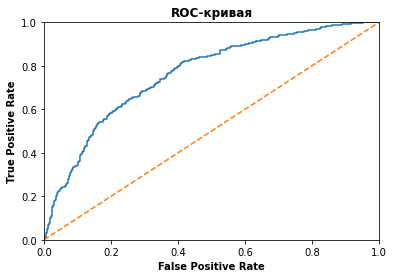

In [33]:
model_down1 = LogisticRegression(random_state=12345, solver='liblinear', max_iter=11, class_weight='balanced')
model_down1.fit(features_downsampled, target_downsampled)
predicted_valid = model_down1.predict(features_valid)
f1_down = f1_score(target_valid, predicted_valid)
probabilities_downsampled = model_down1.predict_proba(features_valid)[:, 1]
roc_auc_downsampled = roc_auc_score(target_valid, probabilities_downsampled)
print(' :::::: После применения техники downsampling (уменьшения выборки) ::::::::')
print()
print(f'F1 downsampled в Логистической Регрессии: {round(f1_down, 3)}')
print(f'AUC-ROC downsampled в Логистической Регрессии: {round(roc_auc_downsampled, 3)}')
print()
#print(cm_lr_up)

fpr, tpr, threshold = roc_curve(target_valid, probabilities_downsampled)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC-кривая', fontweight='bold')
plt.show();

In [34]:
print(' :::::: После применения техники downsampling (уменьшения выборки) на модели Решающего Дерева ::::::::')
print()
func_dtc(features_downsampled, features_valid, target_downsampled, target_valid)

 :::::: После применения техники downsampling (уменьшения выборки) на модели Решающего Дерева ::::::::

Лучшая точность (accuracy) модели Решающего дерева: 0.8335
Лучшие параметры метрики accuracy_score: max_depth = 3, min_samples_split = 2, min_samples_leaf = 1, criterion = entropy

Лучшее значение метрики f1 модели Решающего дерева: 0.6
Лучшие параметры метрики f1: max_depth = 5, min_samples_split = 2, min_samples_leaf = 9, criterion = gini

Лучшее значение AUC-ROC модели Решающего дерева: 0.767
Лучшие параметры метрики AUC-ROC: max_depth = 5, min_samples_split = 2, min_samples_leaf = 9, criterion = gini

Относительные частоты модели Решающего Дерева для проверки баланса:
0    0.6505
1    0.3495
dtype: float64

Матрица ошибок для выявления баланса в модели Решающего Дерева:


array([[1186,  396],
       [ 115,  303]])

In [35]:
print(' :::::: После применения техники downsampling (уменьшения выборки) на модели Случайного Леса ::::::::')
print()
func_rfc(features_downsampled, features_valid, target_downsampled, target_valid)

 :::::: После применения техники downsampling (уменьшения выборки) на модели Случайного Леса ::::::::

Лучшая точность (accuracy) модели Случайного Леса: 0.8025
Лучшие параметры метрики accuracy_score: n_estimators = 33, max_depth = 8, min_samples_split = 2, min_samples_leaf = 3, criterion = entropy

Лучшее значение метрики f1 модели Случайного Леса: 0.611
Лучшие параметры метрики f1: n_estimators = 35, max_depth = 8, min_samples_split = 2, min_samples_leaf = 3, criterion = entropy

Лучшее значение AUC-ROC модели Случайного Леса: 0.781
Лучшие параметры метрики AUC-ROC: n_estimators = 31, max_depth = 8, min_samples_split = 2, min_samples_leaf = 3, criterion = entropy

Относительные частоты модели Случайного Леса для проверки баланса:
0    0.6785
1    0.3215
dtype: float64

Матрица ошибок для выявления баланса в модели Случайного Леса:


array([[1255,  327],
       [ 102,  316]])

### Вывод

* **`Лучшей моделью оказалась модель Случайного Леса техникой увеличения выборки (upsampling) в 4 раза`**. 
    * **Лучшее значение метрики f1 модели Случайного Леса** `0.631`
    * **Лучшие параметры метрики f1**: **n_estimators** = `37`, **max_depth** = `10`, **min_samples_split** = `2`, **min_samples_leaf** = `3`, **criterion** = `entropy`
    * **Лучшее значение AUC-ROC модели Случайного Леса**: `0.786` (правда с другими гиперпараметрами)

Для окончательного вывода стоит проверить на адекватность выявленную модель. Для этого вводим констатную модель:

In [38]:
constant = pd.Series(0, index=target.index)
accuracy_constant = accuracy_score(target, constant)
print(f'Константа: {accuracy_constant}')

mi = RandomForestClassifier(random_state=12345, n_estimators = 37, max_depth = 10, 
                            min_samples_split = 2, min_samples_leaf = 3, criterion = 'entropy') # проверяем с теми же
                                                                                             # параметрами
mi.fit(features_upsampled, target_upsampled)
score = mi.predict(features_valid)
score1 = accuracy_score(target_valid, score)
f1_best = f1_score(target_valid, score)
auc_best = roc_auc_score(target_valid, score)
print(f'Лучшая точность (accuracy_score) выявленной модели: {score1}')
print(f'f1_best: {round(f1_best, 3)}')
print(f'AUC-ROC best: {round(auc_best, 3)}')
print()
if score1 > accuracy_constant:
    print('Выявленная модель прошла тест на адекватность')
else:
    print('Что-то пошло не так')

Константа: 0.7963
Лучшая точность (accuracy_score) выявленной модели: 0.829
f1_best: 0.631
AUC-ROC best: 0.781

Выявленная модель прошла тест на адекватность


## Тестирование модели

Тестовая выборка нужна, чтобы правильно оценить готовую модель: 

In [39]:
model_final = RandomForestClassifier(random_state=12345, n_estimators = 37, max_depth = 10, 
                                     min_samples_split = 2, min_samples_leaf = 3, 
                                     criterion = 'entropy')
model_final.fit(features_upsampled, target_upsampled)
model_final_predict = model_final.predict(features_test)
test_acc = accuracy_score(target_test, model_final_predict)
test_f1 = f1_score(target_test, model_final_predict)
test_auc = roc_auc_score(target_test, model_final_predict)
print(f'Тестовая точность:{round(test_acc, 3)}')
print(f'Тестовая метрика f1: {round(test_f1, 3)}')
print(f'Тестовая метрика AUC-ROC: {round(test_auc, 3)}')
print()
print(f'f1_best: {round(f1_best, 3)}')
print(f'AUC-ROC best: {round(auc_best, 3)}')
print()
if test_f1 > 0.59 and score1 > test_acc:
    print('Проверка на тестовой выборке пройдена')

Тестовая точность:0.814
Тестовая метрика f1: 0.609
Тестовая метрика AUC-ROC: 0.768

f1_best: 0.631
AUC-ROC best: 0.781

Проверка на тестовой выборке пройдена


### Вывод

**`Лучшая модель прошла проверку на тестовой выборке` и получилось удолетворить условие задачи в достижении f1 метрики (`выше 0.59`)**
   * `Тестовая точность`:0.814
   * `Тестовая метрика f1`: 0.609
   * `Тестовая метрика AUC-ROC`: 0.768

  
   * `accuracy_score_best выявленной модели`: 0.829
   * `f1_best`: 0.631
   * `AUC-ROC best`: 0.781